In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias = False)
print(poly.fit_transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias = False)
train_poly = poly.fit_transform(train_input)
print(train_poly.shape)

In [11]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [12]:
test_poly = poly.transform(test_input)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [ ]:
poly = PolynomialFeatures(include_bias = False, degree = 5)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

In [ ]:
print(lr.score(test_poly, test_target))

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

In [23]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [24]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
  ridge = Ridge(alpha = a)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

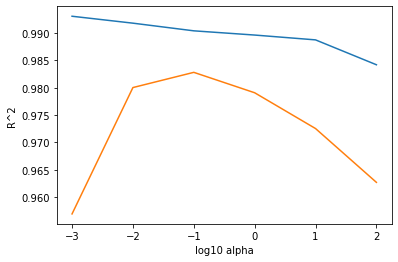

In [25]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10 alpha')
plt.ylabel('R^2')
plt.show()

In [26]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []
for a in alpha_list:
  lasso = Lasso(alpha = a, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('log10 alpha')
plt.ylabel('R^2')
plt.show()

In [32]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [33]:
print(np.sum(lasso.coef_ == 0))

40
